## Função de verosimilhança para v.a. binomial

No handles with labels found to put in legend.


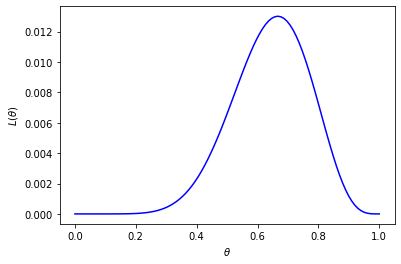

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
theta = np.linspace(0,1,100)

# the function, which is y = sin(x) here
L = 27 * theta**8 * (1-theta)**4

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend(frameon=False, loc=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

# plot the function
plt.plot(theta, L, 'b')

# show the plot
plt.show()

## Função de verosimilhança para v.a. exponencial

No handles with labels found to put in legend.


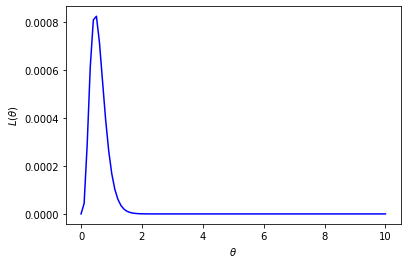

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# 100 linearly spaced numbers
theta = np.linspace(0,10,100)

# the function, which is y = sin(x) here
L = theta**4 * math.e**(-8.65*theta)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend(frameon=False, loc=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

# plot the function
plt.plot(theta, L, 'b')

# show the plot
plt.show()